# Dataset & DataLoader

Code for processing data can get messy and hard to maintain. We ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives to help us manage data in a way that is easy to work with.
 - `Dataset` represents a collection of data samples and their corresponding labels.
 - `DataLoader` wraps an iterable around a Dataset object to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets that subclass `Dataset`. The TorchVision library specifically includes datasets for many computer vision tasks, such as MNIST, CIFAR, COCO, and [much more](https://pytorch.org/vision/stable/datasets.html). In this tutorial, we will use the MNIST dataset.

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import v2

import matplotlib.pyplot as plt

## Loading the dataset

We load the MNIST dataset with the following parameters:
 - `root` is the path where the train/test data is stored,
 - `train` specifies training or test dataset,
 - `download=True` downloads the data from the internet if it's not available at `root`,
 - `transform` accepts a function that transforms the images in the dataset as a preprocessing step.

In [6]:
preprocess = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])

train_ds = MNIST('.data', train=True,  download=True, transform=preprocess)
test_ds  = MNIST('.data', train=False, download=True, transform=preprocess)

print('Train dataset size:', len(train_ds))
print(' Test dataset size:', len(test_ds))

Train dataset size: 60000
 Test dataset size: 10000


The variable `train_ds` is a Dataset object that contains the images and the labels that the model will learn from. Similarly, `test_ds` contains the images that the model will be evaluated on.

## Preprocessing

Data does not always come in its final processed form that is required for training machine learning algorithms. The images in the MNIST dataset are in PIL Image format, and the labels are integers ranging from 0 to 9. For training, we need the images as normalized tensors. To make these transformations, we use the functions provided in the module `torchvision.transforms.v2`.

Hereabove, the MNIST Dataset was instructed to preprocess the images with the following transforms.
 - [`ToImage()`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToImage.html) - Convert a PIL Image, a NumPy array, or even a PyTorch tensor to the `Image` type, which is a subclass of `torch.Tensor`.
 - [`ToDtype()`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToDtype.html) - Convert the input values to floats, and optionally normalize them to the range [0, 1] when `scale=True`.

```{note}
Every TorchVision Dataset includes two arguments, `transform` and `target_transform`, that accept functions to modify the samples and the labels, respectively.
```

Let's take a look at a preprocessed image. We can index a `Dataset` object like a list to retrieve an image and the corresponding label.

In [12]:
image, label = train_ds[0]

print("Image Type:", type(image))
print("Image Min/Max:", image.min().item(), '-', image.max().item())
print("Image Shape:", *image.shape)

Image Type: <class 'torchvision.tv_tensors._image.Image'>
Image Min/Max: 0.0 - 1.0
Image Shape: 1 28 28


## Batching

A Dataset retrieves the images and labels one sample at a time. While training a model, we typically want to pass samples in *"batches”* and reshuffle the data at every epoch. The `DataLoader` class abstracts this complexity for us in an easy API. It takes a `Dataset` object as an argument and provides a Python iterable over the dataset with support for automatic batching, multi-process data loading and many more features. We can configure a DataLoader with the following input arguments (look [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the full list).

- `batch_size`: Number of samples to load per batch. Default is 1.

- `shuffle`: If True, the data is reshuffled at every epoch. This is important for training.
- `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process, which can slow down training for datasets where loading a sample takes a considerable amount of time (e.g., large images). For tiny datasets, 0 workers are usually faster.
- `pin_memory`: If True, the DataLoader will copy Tensors into the GPU pinned memory before returning them. This can save some time for loading data  on the GPU. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
- `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

Here we define a batch size of 64. As a result, each batch fetched by the dataloader will be a tensor of 64 images and a tensor of 64 labels.

In [13]:
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64)

Let's retrieve the first batch of training samples.

In [14]:
for images, labels in train_loader:
    
    print("Image Batch Shape:", *images.shape)
    print("Label Batch Shape:", *labels.shape)

    break # without this, it will print for all batches

Image Batch Shape: 64 1 28 28
Label Batch Shape: 64


Note that the images and the labels are stacked along the first axis (axis=0). 

```{note}
In a tensor representing a batch of samples, the first axis (axis=0) is always the one that indexes the samples.
```

## Visualization

Let's visualize some of the images and labels that are present in the first batch.

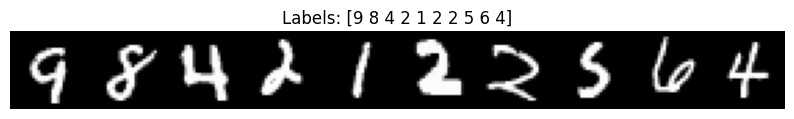

In [15]:
n = 10
side_by_side = torch.cat([img[0] for img in images[:n]], dim=1)

plt.figure(figsize=(10,5))
plt.imshow(side_by_side, cmap='gray')
plt.title("Labels: " + str(labels[:n].numpy()))
plt.axis('off')
plt.show()

## Summary

In this tutorial, we learned how to load a dataset, preprocess the data, and divide it into batches. These are the basic steps that are required to prepare data for training a neural network in PyTorch. In the next tutorial, we will learn how to define a neural network.